In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv("../datasets/output.csv").set_index("Number")
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
Number,,,,,,
1,M,43.2555,30.8421,25.9025,6.3,Yes
2,F,45.6033,28.1900,26.2067,13.5,No
3,F,45.0107,28.9677,26.0215,11.7,No
4,F,44.5398,28.9899,26.4703,13.5,No
5,M,43.2870,30.6972,26.0158,12.4,No


In [6]:
df.shape

(104, 6)

In [7]:
df.isnull().sum()

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 1 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           104 non-null    object 
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), object(2)
memory usage: 5.7+ KB


In [9]:
df["Sex"].nunique()

4

In [10]:
df["Anaemic"] = df["Anaemic"].map({"Yes": 1, "No": 0})
df["Sex"] = df["Sex"].str.strip()

In [11]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
Number,,,,,,
1,M,43.2555,30.8421,25.9025,6.3,1
2,F,45.6033,28.1900,26.2067,13.5,0
3,F,45.0107,28.9677,26.0215,11.7,0
4,F,44.5398,28.9899,26.4703,13.5,0
5,M,43.2870,30.6972,26.0158,12.4,0


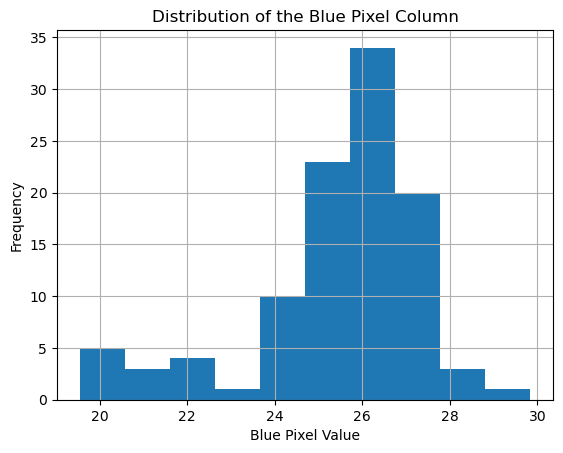

In [12]:
df["%Blue pixel"].hist()
plt.title("Distribution of the Blue Pixel Column")
plt.xlabel("Blue Pixel Value")
plt.ylabel("Frequency")
plt.show()

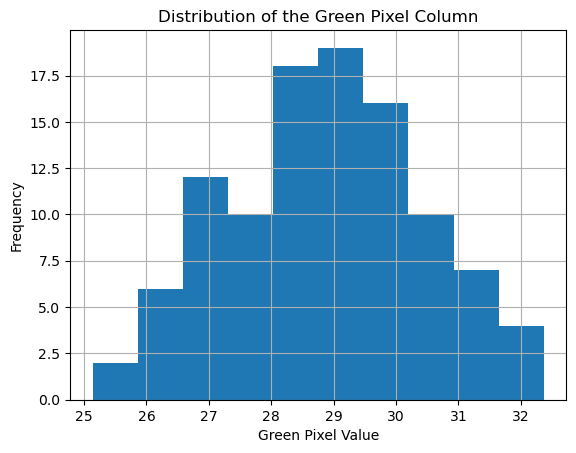

In [13]:
df["%Green pixel"].hist()
plt.title("Distribution of the Green Pixel Column")
plt.xlabel("Green Pixel Value")
plt.ylabel("Frequency")
plt.show()

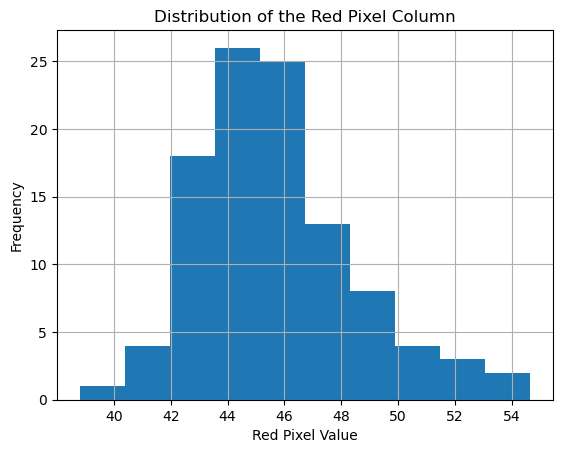

In [14]:
df["%Red Pixel"].hist()
plt.title("Distribution of the Red Pixel Column")
plt.xlabel("Red Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [15]:
df["Sex"].value_counts()

Sex
M    55
F    49
Name: count, dtype: int64

In [16]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("object").columns.tolist()

In [17]:
df[num_cols].corr()

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
%Red Pixel,1.000000,-0.732003,-0.845764,0.424586,-0.353376
%Green pixel,-0.732003,1.000000,0.255589,-0.637340,0.566447
%Blue pixel,-0.845764,0.255589,1.000000,-0.103373,0.057844
Hb,0.424586,-0.637340,-0.103373,1.000000,-0.766506
Anaemic,-0.353376,0.566447,0.057844,-0.766506,1.000000


## Machine Learning

In [37]:
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, MaxAbsScaler
from sklearn.linear_model import LogisticRegression

In [38]:
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), 
    MaxAbsScaler(),
    LogisticRegression(random_state=42)
)

In [20]:
X, y = df.drop(columns=["Anaemic"]), df["Anaemic"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('maxabsscaler', MaxAbsScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [23]:
pipeline.score(X_test, y_test)

0.8333333333333334

In [24]:
pipeline.score(X_train, y_train)

1.0

In [25]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



C:\Users\eigen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eigen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\eigen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
baseline_acc = df["Anaemic"].value_counts(normalize=True).max()
baseline_acc

0.75

In [29]:
len(pipeline.named_steps["randomforestclassifier"].feature_importances_)

353

In [33]:
for col in num_cols[:-1]: 
    df[col] = df[col].astype(float)

In [39]:
pipeline.fit(df.drop(columns=["Anaemic"]), df['Anaemic'])

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('maxabsscaler', MaxAbsScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [42]:
(pipeline.named_steps["logisticregression"].coef_)

array([[ 0.42214575, -0.4234459 ,  0.36077753,  0.46407096,  0.32266057,
         0.394166  , -0.10582971, -0.16487586, -0.09324803,  0.41308872,
        -0.0945816 ,  0.36077753,  0.32266057,  0.28241128,  0.31098687,
        -0.15912223,  0.36077753,  0.39630206,  0.36077753,  0.41308872,
        -0.08572802, -0.15912223, -0.09900113, -0.15236721,  0.46407096,
        -0.17340875, -0.17340875, -0.14541674, -0.15912223, -0.09324803,
        -0.0945816 ,  0.36077753,  0.21002057, -0.0808911 , -0.17340875,
        -0.09900113, -0.0808911 ,  0.36077753, -0.17340875, -0.17340875,
        -0.14750256, -0.09324803, -0.17340875, -0.10582971,  0.36077753,
        -0.16487586, -0.14541674,  0.42545993,  0.28241128, -0.10582971,
        -0.09324803, -0.0893559 , -0.15752917, -0.17340875, -0.11802131,
        -0.09900113, -0.0945816 , -0.09324803, -0.14750256, -0.15912223,
         0.46407096, -0.17340875, -0.0945816 , -0.0808911 , -0.17340875,
        -0.0808911 ,  0.32266057, -0.10582971, -0.0